In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random

In [3]:
updated_anime=pd.read_csv('https://raw.githubusercontent.com/Rizwans-github/Analysis-of-Anime-Recommendations-Dataset/main/DataSet/updated_anime.csv')
updated_anime.head()

,anime_id,name,genre,type,episodes,rating,members,user_rating,count
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,8.30,2199
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,8.03,24574
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,7.96,1386
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,8.13,19283
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,7.71,3673


In [4]:
#Top anime by communities 
top20_anime= updated_anime[updated_anime['members']>100000]
top20_anime= top20_anime[top20_anime['count']>10000]

# Sort the DataFrame by 'members' and 'user_rating' in descending order to get the top 20
top20_anime = top20_anime.sort_values(by=['user_rating'], ascending=False).head(20)

top20_anime.head()

,anime_id,name,genre,type,episodes,rating,members,user_rating,count
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,8.13,19283
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,8.03,24574
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24,9.06,456749,7.84,17854
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888,7.77,24242
29,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi",TV,27,8.78,562962,7.71,19337


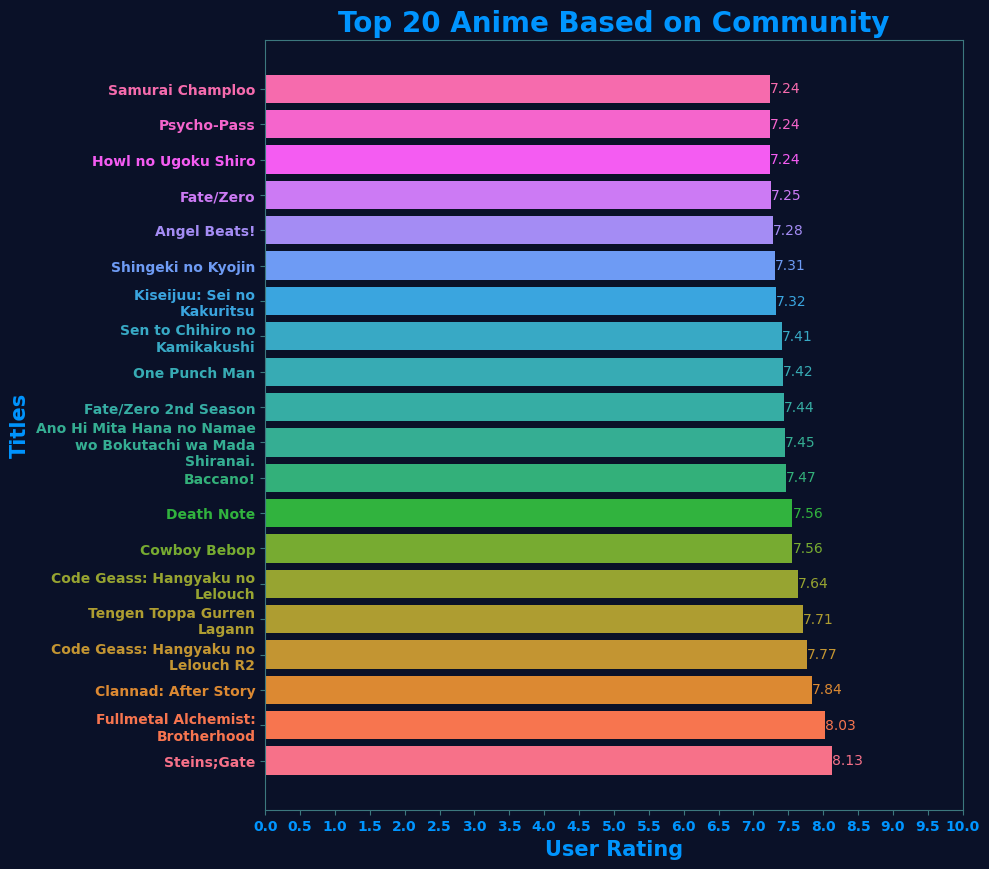

In [6]:
import textwrap
# Create a table for plotting
table_data = pd.DataFrame({
    'Anime Name': top20_anime['name'],
    'User Rating': top20_anime['user_rating']
})

# Create the plot using matplotlib
fig, ax = plt.subplots(figsize=(9, 10))

# Create a color map using seaborn
colors = sns.color_palette("husl", len(table_data))

# Plot the horizontal bar chart
bars = ax.barh(table_data['Anime Name'], table_data['User Rating'], color=colors, height=0.8)

# Set the y-tick positions and labels
ax.set_yticks(range(len(top20_anime)))
wrapped_labels = [textwrap.fill(name, 25) for name in top20_anime['name']]
ax.set_yticklabels(wrapped_labels)

# Set x-axis limits
ax.set_xlim(0, 10)
ax.set_xticks([i * 0.5 for i in range(21)])  # Intervals of 0.5 from 0 to 10

# Wrap the y-axis lab els to limit to 10 letters in a line
wrapped_labels = [textwrap.fill(name, 25) for name in table_data['Anime Name']]
ax.set_yticklabels(wrapped_labels, weight="semibold", fontsize = 10)

# Add labels and title
ax.set_xlabel('User Rating', color = "#0095FF", weight = "bold", fontsize = 15)
ax.set_ylabel('Titles', color = "#0095FF", weight = "bold", fontsize = 15)
ax.set_title('Top 20 Anime Based on Community', color = "#0095FF", weight = "bold", fontsize = 20)
plt.xticks(color = "#0095FF", weight="semibold", fontsize = 10)


ax.spines['top'].set_color("#3C787E") 
ax.spines['bottom'].set_color("#3C787E")
ax.spines['left'].set_color("#3C787E")
ax.spines['right'].set_color("#3C787E")
ax.tick_params(axis= "x", color="#3C787E")
ax.tick_params(axis="y", color="#3C787E")



plt.gcf().set_facecolor("#0A1128")
ax.set_facecolor("#0A1128")
# Add the user ratings on top of the bars
for bar, label, rating, color in zip(bars, ax.get_yticklabels(), table_data['User Rating'], colors):
    label.set_color(color)
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{rating}', 
            va='center', ha='left', color=color)

    

# Show the plot
plt.show()

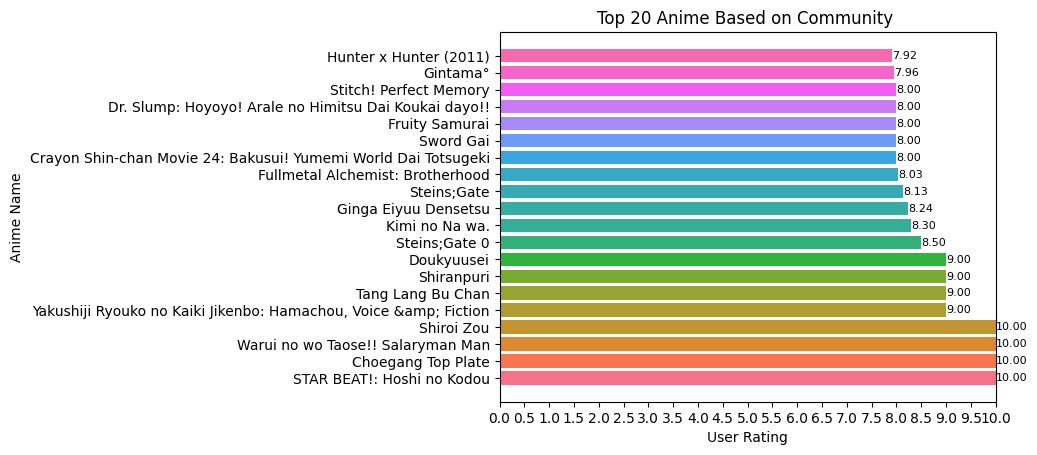

In [7]:
# Sort the DataFrame by 'members' and 'user_rating' in descending order to get the top 20
updated_anime = updated_anime.sort_values(by=['user_rating'], ascending=False).head(20)

# Create a table for plotting
table_data = pd.DataFrame({
    'Anime Name':updated_anime['name'],
    'User Rating': updated_anime['user_rating']
})
# Create the plot using matplotlib
fig, ax = plt.subplots()

# Create a color map using seaborn
colors = sns.color_palette("husl", len(table_data))

# Plot the horizontal bar chart
bars = ax.barh(table_data['Anime Name'], table_data['User Rating'], color=colors)

# Set x-axis limits
ax.set_xlim(0, 10)
ax.set_xticks([i * 0.5 for i in range(21)])  # Intervals of 0.5 from 0 to 10

# Add labels and title
ax.set_xlabel('User Rating')
ax.set_ylabel('Anime Name')
ax.set_title('Top 20 Anime Based on Community ')

# Add the user ratings on top of the bars
for bar, label, rating, color in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=8)

# Show the plot
plt.show()

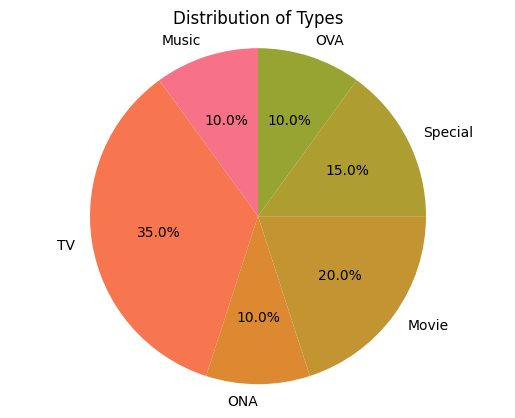

In [8]:
type_counts = Counter(updated_anime['type'])

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(type_counts.values(), labels=type_counts.keys(), autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Types')
plt.show()

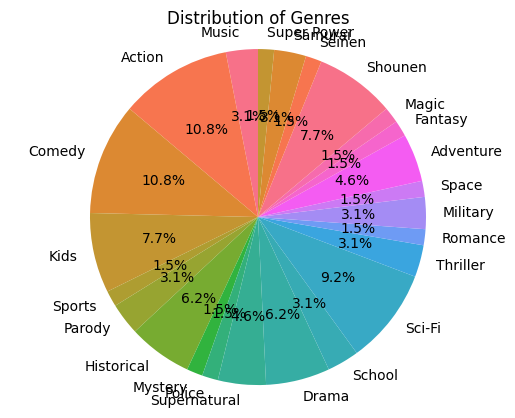

In [9]:
# Create a dictionary to store counts for each genre
genre_counts = {}

# Loop through each column with 'genre' array
for col in updated_anime['genre']:
    # Using list comprehensions to split and trim
    genre_list = [strs.strip() for strs in col.split(',')]
    for j in genre_list:
        if j in genre_counts:
            genre_counts[j]+=1
        else:
            genre_counts[j]=1
          
# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts =ax.pie(genre_counts.values(), labels=genre_counts.keys(), autopct='%1.1f%%', startangle=90, colors=colors)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribution of Genres')
plt.show()